<a href="https://colab.research.google.com/github/pokem1402/section_project_one/blob/main/Test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Dataset

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import colorcet as cc

drive.mount('/content/drive')
path = '/content/drive/My Drive/dataset/vgames2_complete.csv'
df = pd.read_csv("/content/drive/My Drive/dataset/vgames2_complete.csv").drop(axis=1, columns="Unnamed: 0")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터가 적어 무의미한 액션 어드벤쳐 장르와 비주얼 노벨 장르는 데이터에서 제거한다.

In [2]:
df = df.drop(df.loc[(df.Genre == "Action-Adventure") + (df.Genre== "Visual Novel")].index)

# 2. Summary so far

*   EDA 1 : 데이터에 있는 Na 값을 채우기 위해 Crawling을 사용함
*   EDA 2 : 데이터에 있는 불량 값을 데이터 타입에 맞도록 정정함.
*   EDA 3 : Raw 데이터들을 visualization 함으로써 데이터에 대한 insight를 얻음.

# 3. Test for Main Question

이번 장에서는 핵심 질문 및 (가능하면) EDA 3을 진행하면서 가졌던 의문에 대한 검정을 시행한다.

EDA_3 에서 제기된 문제는 우리가 현재 가진 데이터가 최근 플랫폼을 기준으로한 데이터도 아니며 데이터가 2008년을 피크로 2017년까지 제공되어 현재 시기인 2022년과 비교했을 때 5년의 차이가 난다. 따라서 일반적으로 해당 데이터를 해석한 결과가 2022년 또는 그 이후의 해에 제작할 게임의 설계에 토대가 되는 것은 위험한 행위 일 수 있다.

하지만 다음과 같은 가정이 있으면 해당 데이터를 분석하느 것이 도움이 될 수도 있다. 만약 platform의 세대가 교체되어감에 있어서 특별한 통계적 경향성을 데이터로부터 찾아낼 수 있다면 비록 다소 아쉬운 데이터일지라도 추후의 게이머들의 경향성에 대해 추정할 수 있을 것이다.

또한 추가적으로 게임 장르가 다소 편중되어 있는 것도 문제이다. 장르의 편중성이 판매량과 연관이 있는지도 확인해볼만한 문제이다. (만약 장르의 편중성이 판매량과 연관 관계가 옅다면, 수요 때문이 아닌 공급의 문제로 인해 발생한 것이라고 생각할 수 있다.)

## 1) 지역에 따라 선호하는 게임 장르가 다를까?

지역에 따라 선호하는 게임 장르가 다를까? 라는 질문에는 두 가지의 질문이 결합된 질문이라고 할 수 있다.

1.   지역에 따라 선호되는 장르가 존재하는가?
2.   각 지역의 선호하는 장르가 다른가?

따라서 원 질문에 대한 검정을 수행하기 위해서는 이에 대응되도록

1.   각 지역에서 선호도를 대표하는 통계량이 장르간에 통계적으로 유의미하게 다름을 검정 
2.   1번의 검정 결과에 따라서, 둘 이상의 지역이 장르에 대한 선호도가 같지 않음을 확인하였으면 그 지역들의 선호도를 대표하는 통계량이 장르간에 통계적으로 유의미하게 다름을 검정한다.


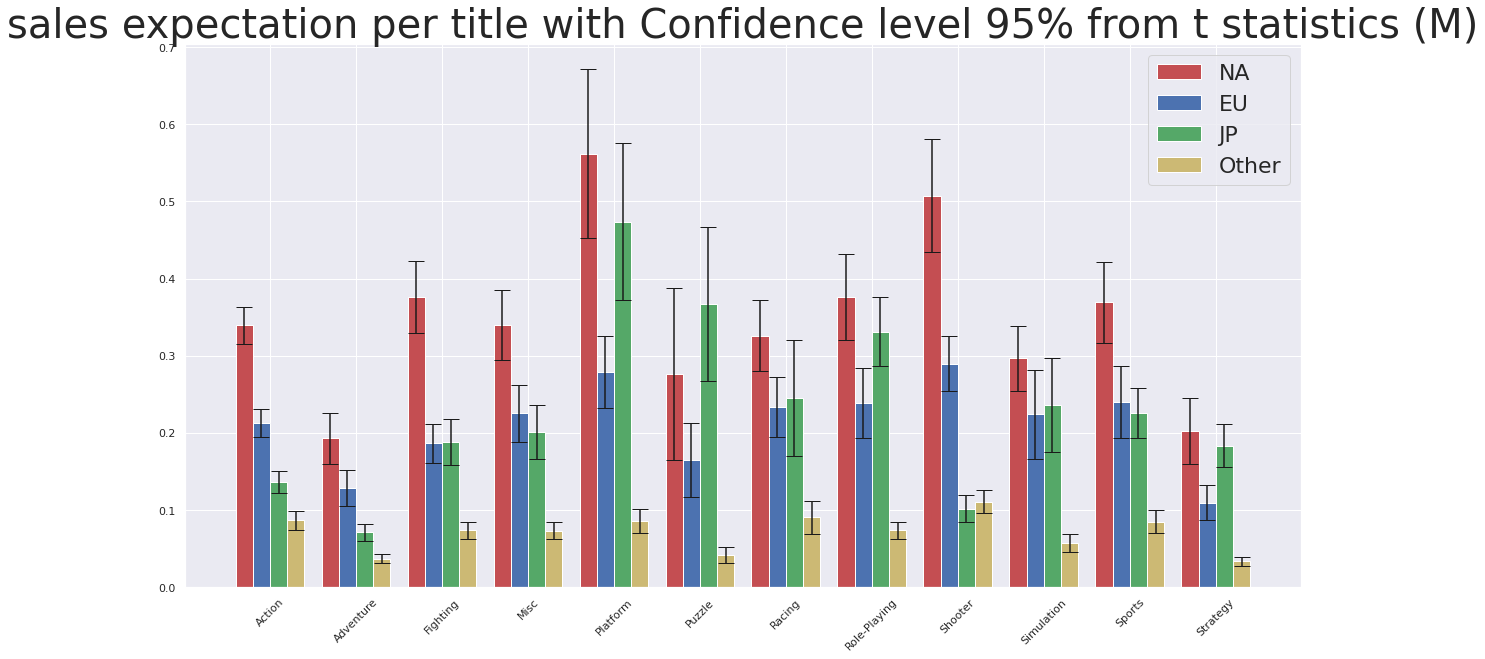

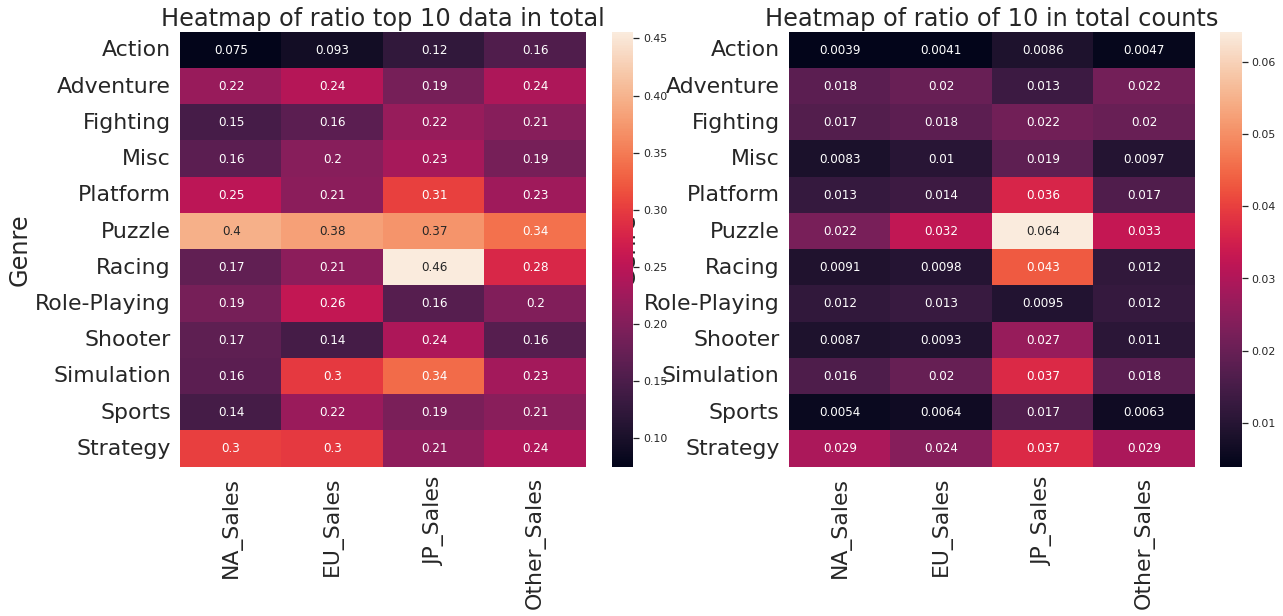

EDA_3 에서 이에 대해서 두 가지 시각화를 진행하였다. 그림 순서대로

1.   각 지역별로 장르별 총 판매량에서 실제 해당 지역에서 판매된 타이틀을 나누어 타이틀 출시시 기대 판매량과 t-score를 이용하여 모수의 신뢰구간 95%를 에러바로 추정한 그래프 
2.   각 지역별, 각 장르마다의 총 판매량에서 10개의 상위 데이터의 합산의 비율. 그리고 실제 출시된 타이틀 수에서 10개라는 숫자의 비율

 시각적으로 판단하기에는 Platform 게임이 평균적으로 가장 높은 기대 판매량을 얻을 수 있는 것처럼 되어있지만, 2번 그림에서 실제로는 소수의 타이틀이 해당 판매량을 견인하는 것을 확인할 수 있다.

 따라서 이를 시각적으로 판단하는 것은 무용하니 통계적 검정을 통해 선호되는 게임 장르를 찾아보자.

### (1) 통계적 검정

#### [1] ANOVA
각 지역의 데이터는 장르라는 카테고리와 판매량인 연속적인 독립 변수를 통해 기대값, 즉 평균값이 통계적으로 유의미하게 차이나는지 아는 것이 목적이므로 ANOVA 검정을 수행한다.

ANOVA 검정을 수행하기 위해서는 3가지 가정을 만족해야한다.


1.   독립성 : 특정 게임 경험으로 인해 다른 게임의 구매를 결정할 수도 있지만 여기에서는 각 판매량은 독립하다고 가정하자.
2.   정규성 확인 : CLT에 의해 표본의 수가 30개를 넘어가면 정규성을 만족한다고 볼 수 있지만 여기에서는 Shapiro-Wilk 검정을 통해 좀 더 엄밀한 검정을 수행하겠다.

 Shapiro-Wilk 검정은 데이터가 정규분포를 가지는지 검정하는 방법으로 다음과 같이 가설을 세운다.

*   $H_0$ : 데이터는 정규 분포이다.
*   $H_1$ : 데이터는 정규 분포가 아니다.

따라서 정규성을 만족하기 위해서는 귀무가설을 채택하고 대립가설을 기각해야한다.

3. 등분산성 확인 : 만약에 정규성 검정에서 정규성이 확인된다면 Bartlett's test를 통해 분산이 같은지를 검정한다. 다음과 같은 가설을 세운다.


*   $H_0$ : 데이터 집합들의 분산이 같다.
*   $H_1$ : 데이터 집합들의 분산이 같지 않다.

따라서 등분산을 만족하기 위해서는 귀무가설을 기각하여 대립가설을 채택해야한다.

In [3]:
df_nan = df.replace(0, np.nan)

### (2) 북미 지역 검정

In [4]:
from scipy.stats import shapiro

In [5]:
def get_subset(df, attr, criterion = "Genre"):
  return df[[criterion, attr]][df[attr] > 0]

In [6]:
NA = get_subset(df, "NA_Sales")

In [7]:
NA_group = NA.groupby("Genre")

for genre in NA.Genre.unique():
  print(shapiro(NA_group.get_group(genre).NA_Sales))

ShapiroResult(statistic=0.46392232179641724, pvalue=0.0)
ShapiroResult(statistic=0.3245753049850464, pvalue=0.0)
ShapiroResult(statistic=0.2965671420097351, pvalue=0.0)
ShapiroResult(statistic=0.4515789747238159, pvalue=1.1840929984590775e-39)
ShapiroResult(statistic=0.33940476179122925, pvalue=0.0)
ShapiroResult(statistic=0.15160256624221802, pvalue=1.3732164430997477e-40)
ShapiroResult(statistic=0.4714536666870117, pvalue=1.866717190631231e-30)
ShapiroResult(statistic=0.402412474155426, pvalue=0.0)
ShapiroResult(statistic=0.18197375535964966, pvalue=0.0)
ShapiroResult(statistic=0.5882813930511475, pvalue=3.494990077960958e-35)
ShapiroResult(statistic=0.3468581438064575, pvalue=0.0)
ShapiroResult(statistic=0.3827809691429138, pvalue=1.4694380034510756e-39)


놀랍게도 NA의 장르를 대표로한 모든 부분집합이 정규성을 만족하지 않는다. 이 위의 그래프를 보면 당연하지만 0 부근에 데이터가 많고 양수쪽으로 확장되는, 즉 반쪽자리 종의 형태를 지니는 데이터 특성 때문에 정규성을 만족할 수 없다.

그렇다면 정규성을 만족하지 않은 상태에서 할 수 있는 검정인 Kruskall-Wallis 검정을 수행하도록 한다.

해당 검정은 중앙값에 대해 검정을 수행한다.

*   $H_0$ : 모든 그룹의 중앙값은 서로 같다.
*   $H_1$ : 모든 그룹의 중앙값이 모두 같은 건 아니다.

EDA 3에서 가져온 그래프에서도 평균의 함정이 존재하는 것을 확인했기 때문에 중앙값을 비교하는 것이 의미있는 검정이 될 수 있다.

In [8]:
from scipy.stats import kruskal

Genre_list =NA.Genre.unique()
NA_list = [np.array(NA_group.get_group(genre).NA_Sales) for genre in Genre_list]

print(kruskal(*NA_list))

KruskalResult(statistic=289.0861750358956, pvalue=1.7398161127555447e-55)


kruskal test 결과 p-value가 1.73e-55이므로 $H_0$을 기각한다.

따라서 북미 지역의 각 장르별 판매량 부분집합의 중앙값은 유의한 차이가 있다. 라고 할 수 있다.

사후 검정을 위해 Mann-Whitney 검정을 pair 별로 수행하여 각 집단 별로 유의한 차이가 있는지 검정한다.

이 때 pair 수만큼 테스트하면서 p의 검정력이 떨어지므로 비교 숫자를 나누어서 보정하는 Bonferroni correction method를 사용한다.

In [9]:
from scipy.stats import mannwhitneyu
calibrated_alpha = 1. / (12*11)

for i in range(len(NA_list)):
  for j in range(i+1, len(NA_list)):
    _, pvalue = mannwhitneyu(x=NA_list[i], y=NA_list[j])
    print(i," ", j," : ", pvalue < calibrated_alpha)

0   1  :  False
0   2  :  True
0   3  :  False
0   4  :  True
0   5  :  True
0   6  :  True
0   7  :  False
0   8  :  False
0   9  :  False
0   10  :  False
0   11  :  True
1   2  :  True
1   3  :  False
1   4  :  True
1   5  :  True
1   6  :  True
1   7  :  False
1   8  :  True
1   9  :  False
1   10  :  False
1   11  :  True
2   3  :  True
2   4  :  True
2   5  :  True
2   6  :  True
2   7  :  True
2   8  :  False
2   9  :  False
2   10  :  False
2   11  :  True
3   4  :  False
3   5  :  True
3   6  :  True
3   7  :  False
3   8  :  True
3   9  :  False
3   10  :  False
3   11  :  True
4   5  :  True
4   6  :  True
4   7  :  False
4   8  :  True
4   9  :  True
4   10  :  True
4   11  :  True
5   6  :  False
5   7  :  True
5   8  :  True
5   9  :  True
5   10  :  True
5   11  :  False
6   7  :  True
6   8  :  True
6   9  :  True
6   10  :  True
6   11  :  False
7   8  :  True
7   9  :  False
7   10  :  False
7   11  :  True
8   9  :  False
8   10  :  False
8   11  :  True
9   10  :  F

pair-wise 한 비교를 통해 많은 관계에서 동일하지 않다는 것을 확인하였으므로 가장 크다고 말할 수 있는 집단을 검정을 통해 찾는다.

Mann-Whitney 검정 및 t-검정을 이용해 다음의 가설을 검정한다.

각 군 $A_i$에 대해 다음과 같은 가설을 세운다.

*   $H_0$ : $A_j$는 $A_i$ 보다 작지는 않다. ( $i \neq j$)
*   $H_1$ : $A_j$는 $A_i$ 보다 작다.



In [10]:
from scipy.stats import ttest_ind

biggest = []

for i in range(len(NA_list)):

  null_hypothesis = False
  for j in range(len(NA_list)):
    if i==j:
      continue
    _, pvalue_U = mannwhitneyu(x=NA_list[i], y=NA_list[j], alternative='greater')
    _, pvalue_t = ttest_ind(NA_list[i], NA_list[j], alternative="greater")

    if (pvalue_t >= 0.5) or (pvalue_U >= 0.5):
      null_hypothesis = True
      break
  
  if (null_hypothesis == False): # if rejected
    biggest.append(i)

print(biggest)

[2]


In [11]:
print(Genre_list[2])

Platform


검정 결과에 따라 북미 지역은 Platform의 판매량 기댓값이 유의미하게 높다고 할 수 있다.

### (3) 유럽 지역

(2) 과 같은 과정으로 진행한다.

In [12]:
EU = get_subset(df, "EU_Sales")

In [13]:
EU_group = EU.groupby("Genre")

# 정규성 검정
for genre in EU.Genre.unique():
  print(shapiro(EU_group.get_group(genre).EU_Sales))

ShapiroResult(statistic=0.4059402346611023, pvalue=1.5834672646870433e-43)
ShapiroResult(statistic=0.28522586822509766, pvalue=3.742349717779786e-40)
ShapiroResult(statistic=0.417604923248291, pvalue=0.0)
ShapiroResult(statistic=0.3067222237586975, pvalue=0.0)
ShapiroResult(statistic=0.3338964581489563, pvalue=0.0)
ShapiroResult(statistic=0.422318696975708, pvalue=2.943292065608857e-34)
ShapiroResult(statistic=0.1757659912109375, pvalue=0.0)
ShapiroResult(statistic=0.5889551639556885, pvalue=7.385991001361372e-34)
ShapiroResult(statistic=0.47223198413848877, pvalue=0.0)
ShapiroResult(statistic=0.32970529794692993, pvalue=0.0)
ShapiroResult(statistic=0.4424399137496948, pvalue=1.3272690995971856e-36)
ShapiroResult(statistic=0.3556618094444275, pvalue=1.5733327731448104e-31)


정규성을 가정하는 귀무가설 기각으로 정규성을 가지지 않는다.

In [14]:
Genre_list = EU.Genre.unique()
EU_list = [np.array(EU_group.get_group(genre).EU_Sales) for genre in Genre_list]

print(kruskal(*EU_list))

KruskalResult(statistic=164.30976653046585, pvalue=1.7447375603611478e-29)


모든 집합의 중앙값이 같다라는 귀무가설을 기각

In [15]:
calibrated_alpha = 1. / (12*11)

for i in range(len(EU_list)):
  for j in range(i+1, len(EU_list)):
    _, pvalue = mannwhitneyu(x=EU_list[i], y=EU_list[j])
    print(i," ", j," : ", pvalue < calibrated_alpha)

0   1  :  True
0   2  :  False
0   3  :  False
0   4  :  False
0   5  :  True
0   6  :  False
0   7  :  False
0   8  :  False
0   9  :  False
0   10  :  True
0   11  :  True
1   2  :  False
1   3  :  False
1   4  :  False
1   5  :  True
1   6  :  False
1   7  :  False
1   8  :  True
1   9  :  False
1   10  :  False
1   11  :  True
2   3  :  False
2   4  :  False
2   5  :  True
2   6  :  False
2   7  :  False
2   8  :  True
2   9  :  False
2   10  :  True
2   11  :  True
3   4  :  False
3   5  :  True
3   6  :  False
3   7  :  False
3   8  :  True
3   9  :  False
3   10  :  True
3   11  :  True
4   5  :  True
4   6  :  False
4   7  :  False
4   8  :  True
4   9  :  False
4   10  :  True
4   11  :  True
5   6  :  True
5   7  :  True
5   8  :  True
5   9  :  True
5   10  :  False
5   11  :  False
6   7  :  False
6   8  :  True
6   9  :  False
6   10  :  True
6   11  :  True
7   8  :  False
7   9  :  False
7   10  :  True
7   11  :  True
8   9  :  True
8   10  :  True
8   11  :  True
9   1

값이 제각각이므로 제일 큰 값에 대한 검정을 수행한다.

In [16]:
biggest = []

for i in range(len(EU_list)):

  null_hypothesis = False
  for j in range(len(EU_list)):
    if i==j:
      continue
    _, pvalue_U = mannwhitneyu(x=EU_list[i], y=EU_list[j], alternative='greater')
    _, pvalue_t = ttest_ind(EU_list[i], EU_list[j], alternative="greater")

    if (pvalue_t >= 0.5) or (pvalue_U >= 0.5):
      null_hypothesis = True
      break
  
  if (null_hypothesis == False): # if rejected
    biggest.append(i)

print(biggest)

[8]


In [17]:
print(Genre_list[8])

Shooter


### (4) 일본 지역

In [18]:
JP = get_subset(df, "JP_Sales")

In [19]:
JP_group = JP.groupby("Genre")

# 정규성 검정
for genre in JP.Genre.unique():
  print(shapiro(JP_group.get_group(genre).JP_Sales))

ShapiroResult(statistic=0.34894371032714844, pvalue=4.203895392974451e-45)
ShapiroResult(statistic=0.49783188104629517, pvalue=5.592736313951421e-38)
ShapiroResult(statistic=0.4675877094268799, pvalue=0.0)
ShapiroResult(statistic=0.4130900502204895, pvalue=0.0)
ShapiroResult(statistic=0.510991632938385, pvalue=7.618565313736446e-34)
ShapiroResult(statistic=0.5364893674850464, pvalue=2.176524399105521e-26)
ShapiroResult(statistic=0.5297584533691406, pvalue=1.768207190529497e-30)
ShapiroResult(statistic=0.46344876289367676, pvalue=4.087961150554142e-37)
ShapiroResult(statistic=0.6932157278060913, pvalue=6.273443485585236e-22)
ShapiroResult(statistic=0.5178263783454895, pvalue=1.4173705868766317e-20)
ShapiroResult(statistic=0.43179434537887573, pvalue=1.817042487563448e-26)
ShapiroResult(statistic=0.4204539656639099, pvalue=1.3749018872573608e-28)


In [20]:
JP_list = [np.array(JP_group.get_group(genre).JP_Sales) for genre in Genre_list]

print(kruskal(*JP_list))

KruskalResult(statistic=588.3186416484259, pvalue=4.4123213862300757e-119)


In [21]:
calibrated_alpha = 1. / (12*11)

for i in range(len(JP_list)):
  for j in range(i+1, len(JP_list)):
    _, pvalue = mannwhitneyu(x=JP_list[i], y=JP_list[j])
    print(i," ", j," : ", pvalue < calibrated_alpha)

0   1  :  True
0   2  :  True
0   3  :  True
0   4  :  True
0   5  :  True
0   6  :  True
0   7  :  True
0   8  :  True
0   9  :  True
0   10  :  True
0   11  :  False
1   2  :  True
1   3  :  True
1   4  :  True
1   5  :  False
1   6  :  False
1   7  :  False
1   8  :  True
1   9  :  False
1   10  :  True
1   11  :  True
2   3  :  False
2   4  :  True
2   5  :  True
2   6  :  True
2   7  :  True
2   8  :  True
2   9  :  False
2   10  :  True
2   11  :  True
3   4  :  True
3   5  :  True
3   6  :  True
3   7  :  True
3   8  :  False
3   9  :  False
3   10  :  True
3   11  :  True
4   5  :  False
4   6  :  False
4   7  :  True
4   8  :  True
4   9  :  True
4   10  :  True
4   11  :  False
5   6  :  False
5   7  :  False
5   8  :  True
5   9  :  True
5   10  :  True
5   11  :  True
6   7  :  False
6   8  :  True
6   9  :  True
6   10  :  True
6   11  :  True
7   8  :  True
7   9  :  False
7   10  :  True
7   11  :  True
8   9  :  True
8   10  :  True
8   11  :  True
9   10  :  True
9   1

In [23]:
biggest = []

for i in range(len(JP_list)):

  null_hypothesis = False
  for j in range(len(JP_list)):
    if i==j:
      continue
    _, pvalue_U = mannwhitneyu(x=JP_list[i], y=JP_list[j], alternative='greater')
    _, pvalue_t = ttest_ind(JP_list[i], JP_list[j], alternative="greater")

    if (pvalue_t >= 0.5) or (pvalue_U >= 0.5):
      null_hypothesis = True
      break
  
  if (null_hypothesis == False): # if rejected
    biggest.append(i)

print(biggest)

[0]


In [24]:
print(Genre_list[0])

Platform


### (5) 기타 지역

In [25]:
Other = get_subset(df, "Other_Sales")

In [26]:
Other_group = Other.groupby("Genre")

# 정규성 검정
for genre in Other.Genre.unique():
  print(shapiro(Other_group.get_group(genre).Other_Sales))

ShapiroResult(statistic=0.19214218854904175, pvalue=0.0)
ShapiroResult(statistic=0.36899125576019287, pvalue=2.7805965427597345e-41)
ShapiroResult(statistic=0.1923997402191162, pvalue=0.0)
ShapiroResult(statistic=0.4663178324699402, pvalue=1.4354140193032278e-30)
ShapiroResult(statistic=0.28219884634017944, pvalue=1.2884939379466693e-41)
ShapiroResult(statistic=0.4891270399093628, pvalue=1.9893854310717454e-35)
ShapiroResult(statistic=0.4476540684700012, pvalue=0.0)
ShapiroResult(statistic=0.34560924768447876, pvalue=0.0)
ShapiroResult(statistic=0.20183342695236206, pvalue=0.0)
ShapiroResult(statistic=0.4009597897529602, pvalue=2.802596928649634e-45)
ShapiroResult(statistic=0.3939289450645447, pvalue=1.8747549298377133e-36)
ShapiroResult(statistic=0.34047144651412964, pvalue=1.2416503500405203e-31)


In [27]:
Other_list = [np.array(Other_group.get_group(genre).Other_Sales) for genre in Genre_list]

print(kruskal(*Other_list))

KruskalResult(statistic=258.9810110232498, pvalue=3.66808799316637e-49)


In [28]:
calibrated_alpha = 1. / (12*11)

for i in range(len(Other_list)):
  for j in range(i+1, len(Other_list)):
    _, pvalue = mannwhitneyu(x=Other_list[i], y=Other_list[j])
    print(i," ", j," : ", pvalue < calibrated_alpha)

0   1  :  True
0   2  :  False
0   3  :  False
0   4  :  False
0   5  :  True
0   6  :  False
0   7  :  False
0   8  :  False
0   9  :  True
0   10  :  True
0   11  :  True
1   2  :  True
1   3  :  True
1   4  :  False
1   5  :  True
1   6  :  True
1   7  :  True
1   8  :  True
1   9  :  False
1   10  :  True
1   11  :  True
2   3  :  False
2   4  :  False
2   5  :  True
2   6  :  False
2   7  :  False
2   8  :  True
2   9  :  True
2   10  :  True
2   11  :  True
3   4  :  False
3   5  :  True
3   6  :  False
3   7  :  False
3   8  :  True
3   9  :  True
3   10  :  True
3   11  :  True
4   5  :  True
4   6  :  False
4   7  :  False
4   8  :  True
4   9  :  False
4   10  :  True
4   11  :  True
5   6  :  True
5   7  :  True
5   8  :  True
5   9  :  True
5   10  :  False
5   11  :  False
6   7  :  False
6   8  :  True
6   9  :  True
6   10  :  True
6   11  :  True
7   8  :  False
7   9  :  True
7   10  :  True
7   11  :  True
8   9  :  True
8   10  :  True
8   11  :  True
9   10  :  True

In [29]:
biggest = []

for i in range(len(Other_list)):

  null_hypothesis = False
  for j in range(len(Other_list)):
    if i==j:
      continue
    _, pvalue_U = mannwhitneyu(x=Other_list[i], y=Other_list[j], alternative='greater')
    _, pvalue_t = ttest_ind(Other_list[i], Other_list[j], alternative="greater")

    if (pvalue_t >= 0.5) or (pvalue_U >= 0.5):
      null_hypothesis = True
      break
  
  if (null_hypothesis == False): # if rejected
    biggest.append(i)

print(biggest)

[8]


In [30]:
print(Genre_list[8])

Shooter


### (6) 결론

1. 각각의 지역의 장르에 따른 데이터들은 정규성을 만족하지 않아서 ANOVA 검정을 진행하지 않았다.
2. kruskal 검정을 통해 각 집단이 같은 중앙값을 가졌는지 확인하였으나, 모든 귀무가설을 채택하여 중앙값이 같지 않음을 확인했다.
3. Mann-whitney 방법으로 pairwise하게 비교한 뒤 Bonferroni correction method로 유의 수준을 보정했지만 귀무가설을 기각하지 못했다.
3. pairwise하게 t검정 방법과 Mann-whitney 방법을 통해 특정 집합이 크다라는 대립가설과 크지 않다는 귀무가설을 세운 뒤 모든 다른 집합에 대해 대립가설을 채택한 부분집합을 선정하였다.

*   북미 지역의 판매 기대값이 유의미하게 큰 장르 : Platform
*   유럽 지역의 판매 기대값이 유의미하게 큰 장르 : Shooter 
*   일본 지역의 판매 기대값이 유의미하게 큰 장르 : Platform
*   유럽 지역의 판매 기대값이 유의미하게 큰 장르 : Shooter

로 지역에 따라 선호하는 게임 장르가 다르다.


## 2) 연도별 게임의 트렌드가 있을까?

트렌드라는 말의 정의가 중요한 것 같다.

트렌드는 사전적 정의로는 [사상이나 행동 또는 어떤 현상에서 나타나는 일정한 방향](https://ko.dict.naver.com/#/entry/koko/3a6841a0737d4aeb8eeb18cccb53dcce)을 말한다.

 통계적으로 트렌드가 존재함을 어떻게 증명해야할지는 잘 모르겠다. 각 연도별로 위에서 기댓값이 유의미하게 큰 장르를 선별한 것처럼 매년 검정을 돌리는 방법 밖에 생각이 안나지만 그 방법은 쓰고 싶지 않다.

사전적 정의는 저러하지만 우리는 해당 데이터에 대한 트렌드의 정의를 두 가지로 정의하고자 한다.


1.   공급자에 의해 발생하는 트렌드
2.   수요자에 의해 발생하는 트렌드

왜 위와 같이 정의하려하는 지 우선 아래의 그림을 보자.

### (1) 시간에 따라 출시되는 타이틀의 수를 장르별로 나타낸 그래프

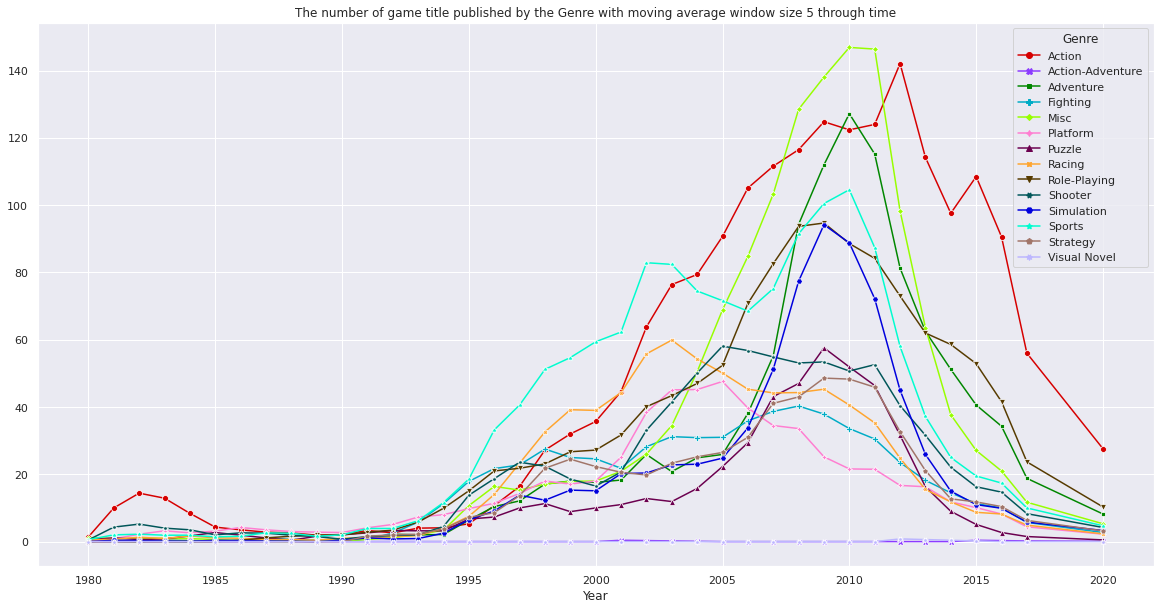

해당 그래프는 시간에 따라 발매하는 타이틀의 수를 장르의 카테고리로 표현하여 나타낸 것이다. 해당 그래프는 EDA_3에서 2) (2)에서 확인할 수 있다. 

원래 데이터는 굴곡이 많아 추세에 대해 설명하기 어려워서 이동평균을 적용하여 그래프를 고르게 만들었다.

2010년에서 큰 종 모양 선을 형성하는 MISC 를 제외하고 보면 1990년 대 후반부터 급격하게 발매되는 게임 타이틀의 수가 증가하였다. 특히 액션 게임과 어드벤쳐 게임이 특히 그러하다. 

### (2) 시간에 따라 장르별로 판매된 게임의 총 판매량을 나타낸 그래프

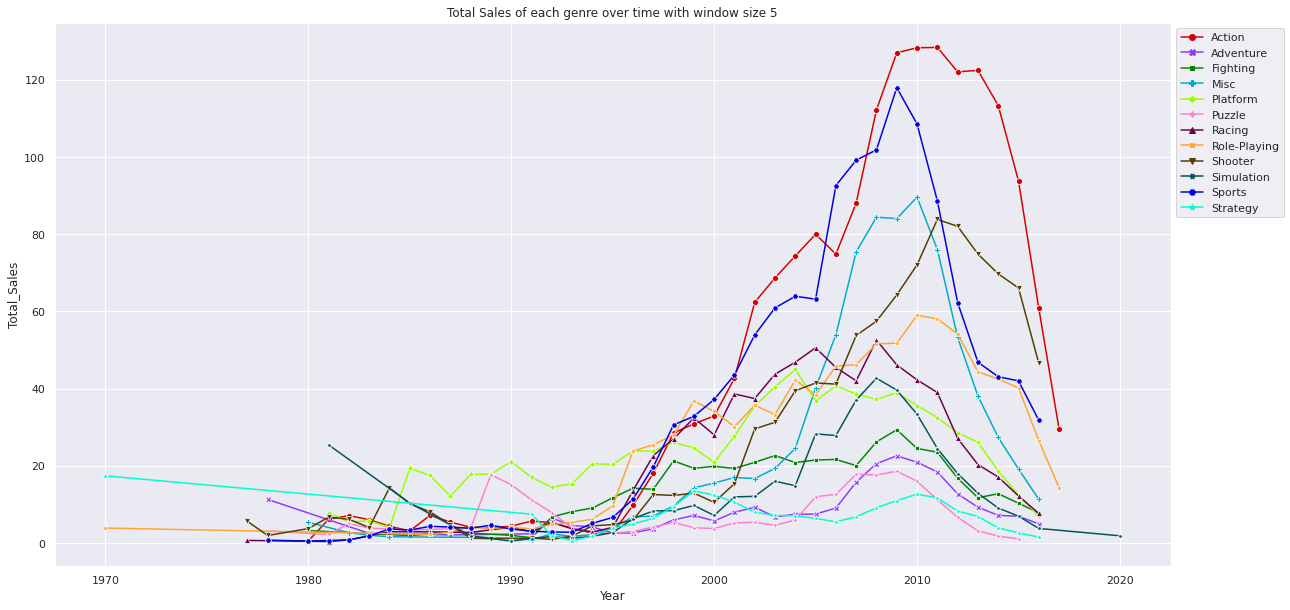

위의 그래프는 각 연도별 각 장르의 타이틀의 판매량에 대해 나타내는 그래프이다. 이동평균 윈도우 사이즈 5로 설정하였다. 첫번째 그래프와는 다르게 최신 데이터에 더 가중치를 두었다. 해당 그래프는 EDA_3 3)(2)\[2\] 에서 확인할 수 있다.

첫 번째 그래프와 두 번째 그래프 사이에는 데이터 부족으로 인해 삭제된 장르가 존재하여 색이 매칭되지는 않는다.

첫 번째 그래프와 두 번째 그래프로 추정할 수 있는 사실은 수요가 공급을 요구하였든, 공급에 의해 수요가 발생했든 간에 ***타이틀을 발매하는 만큼 판매량도 늘었다. 즉 판매량과 발매된 타이틀이 유사한 곡선을 그린다는 사실이다.***

첫번째 그래프가 두 번째 그래프보다 피크가 늦게 발생하지만 2010년 중심으로 데이터가 종 모양으로 형성되어있는 것도 확인할 수 있다.


### (3) 각 지역마다 장르별 판매된 게임의 총 판매 수를 나타낸 그래프

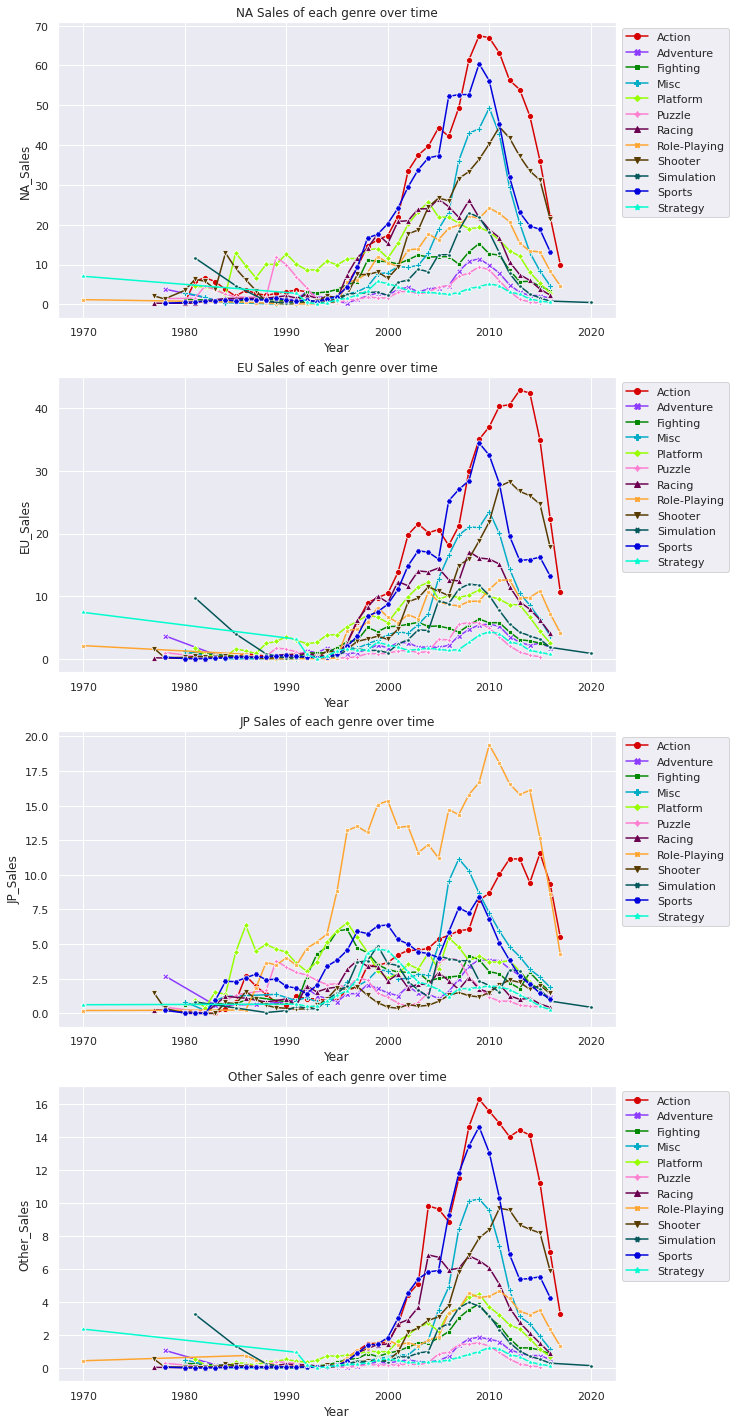

위의 4개의 그래프는 앞선 두번째 그래프로부터 북미, 유럽, 일본, 그외 지역을 분리하여 만든 그래프이다. 일본의 경우는 독특하지만 전체 판매량과 유사한 그래프를 그리는 것을 확인할 수 있다.

### (4) 각 지역마다 장르별 출시된 타이틀 마다의 기대 판매량

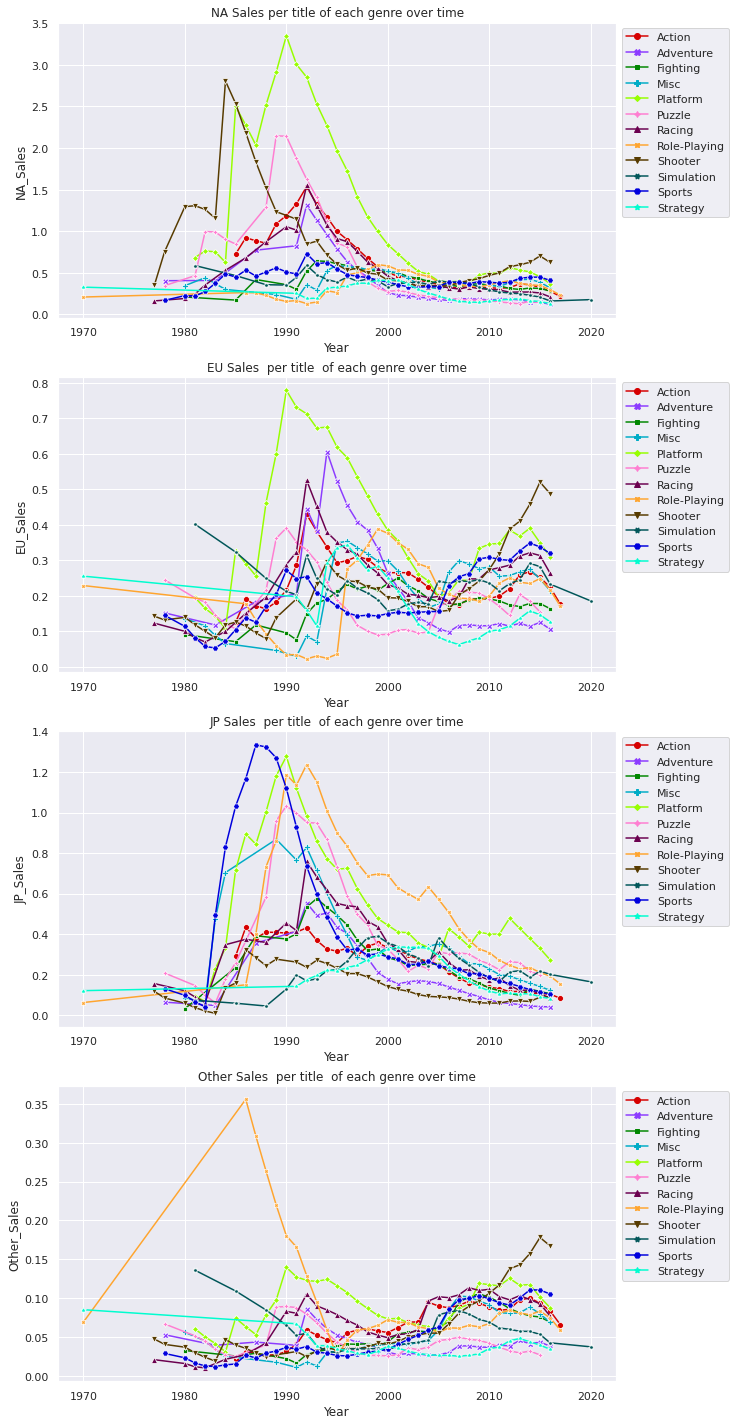

위의 4개의 그래프는 매년 각 장르별 출시된 게임 타이틀의 판매량을 실제 출시된 타이틀 수로 나누어준 값이다. 즉 이전까지의 그래프는 출시된 타이틀을 고려하지 않고 총 판매량만을 고려한 그래프인데, 바로 위의 4개의 그래프는 매년 타이틀을 출시할 때마다 기대할 수 있는 판매량이다. 

판매량을 나타낸 그래프는 1990년 이후로 판매량이 증가해서 (아마 데이터의 부족으로) 2010년 이후에는 감소 추세로 보이지만 타이틀 별 기대 판매량을 나타낸 그래프는 다른 얘기를 한다. 각 지역마다의 y 값 스케일을 고려해야하겠지만 전체적으로는 감소 추세이거나 많이 증가하지 않은 것을 확인할 수 있다.

또한 판매량 그래프에서는 항상 상위를 차지했던 Action 장르는 기대 판매량 차트에서는 중위 수준에 머무르고 있다. 일본을 제외한다면 오히려 판매량 그래프에서는 눈에 띄지 않았던 shooting game의 상승이 도드라진다.

정리하면 판매량을 통해서 보이는 추세는 공급자가 타이틀을 공급해서 발생된다. 기대 판매량 그래프를 확인했을 때 기대 판매량이 증가하지 않았고, 타이틀 수는 점점 증가했으므로 공급에 맞춰서 게이머들이 타이틀을 구매하여 해당 장르의 시장이 커졌다고 할 수 있다.

기대 판매량을 통해서 보이는 추세는 주로 공급자의 공급 요인보다는 수요자의 수요요인이 크다고 할 수 있다. 이는 기대 판매량이 떨어지는 장르는 구매자에게 선택의 폭이 넓어졌거나 해당 장르에 대한 수요 자체가 떨어졌음으로 해석할 수 있고 기대 판매량이 상승하는 장르는 해당 장르에 대한 수요가 상승했음을 보여준다. 

## 3) 출고량이 높은 게임은 어떤 것일까?

# 4. Test for Sub Question